In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model
import plot_tools
import clock_work_axion
import reheating
import transport_equation
from common import constants, cosmology

In [120]:
Gamma_phi = 1e7
H_inf = 2e10
mR = 6
m_phi = 100 * 1e-9 # [GeV]
eps = clock_work_axion.calc_eps(mR)
f = 1e12
f_eff = clock_work_axion.calc_f_eff(f, eps)
M = m_phi / eps

In [4]:
m = model.AxionBaryogenesisModel(
    source_vector=transport_equation.source_vector_weak_sphaleron, 
    get_axion_source=clock_work_axion.get_axion_source_clockwork,
    axion_rhs=clock_work_axion.rhs_log_t,
    calc_axion_mass=clock_work_axion.calc_mass,
    axion_parameter=(eps, M),
    axion_initial=(clock_work_axion.theta_to_phi_over_f(1.0, eps), 0),
    Gamma_phi=Gamma_phi,
    H_inf=H_inf,
)

/home/jana/Documents/master-project/transport_eq_in_time/clock_work_axion.py:59: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)
/home/jana/Documents/master-project/transport_eq_in_time/plot_tools.py:29: RuntimeWarning: invalid value encountered in true_divide
  y = theta_dot / T / source_scale


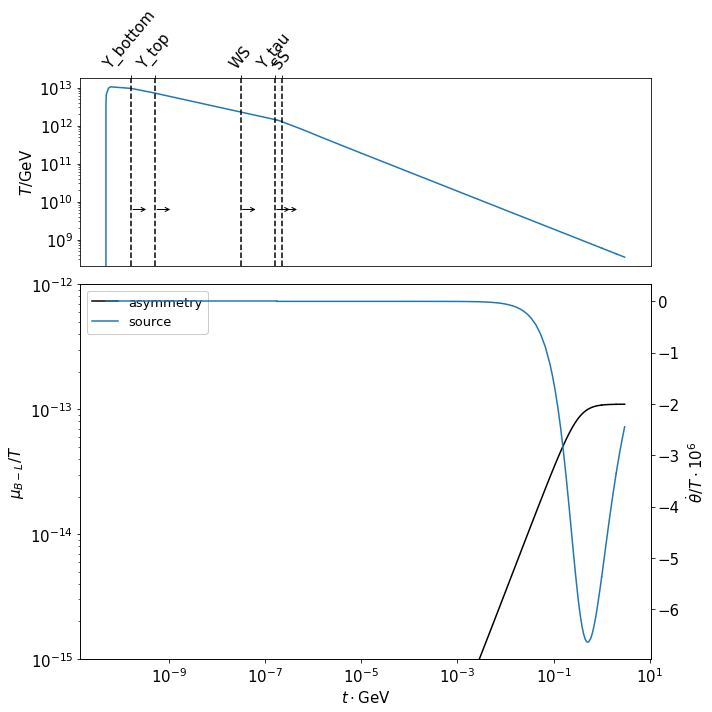

In [5]:
res = model.solve(m, collect=True)
plot_tools.plot(res, asymmetry_limits=(1e-15, 1e-12), source_scale=1e-9)

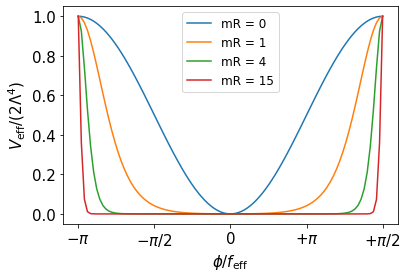

In [112]:
alpha_range = np.linspace(-np.pi, np.pi, 100)
for plot_mR in [0, 1, 4, 15]:
    eps = clock_work_axion.calc_eps(plot_mR)
    phi_over_f_range = clock_work_axion.calc_f_eff(f, eps) * alpha_range / f # not a linear map
    Lambda = np.sqrt(M * f)
    y = clock_work_axion.calc_V_eff_over_f_sq(phi_over_f_range, eps, M) * f**2 / (2*Lambda**4)
    y[0] = 1; y[-1] = 1 # okay this is bad
    plt.plot(alpha_range, y, label=f"mR = {plot_mR}")
plt.xlabel(r"$\phi / f_\mathrm{eff}$", fontsize=15)
plt.ylabel(r"$V_\mathrm{eff} / (2 \Lambda^4)$", fontsize=15)
plt.legend(fontsize=12)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r"$-\pi$", r"$-\pi/2$", "0", r"$+\pi$", r"$+\pi/2$"], fontsize=15)
plt.yticks(fontsize=15);

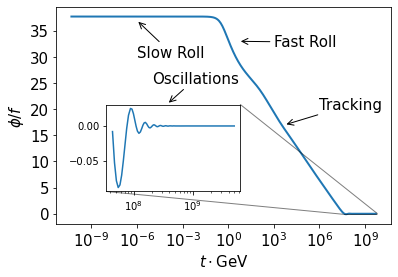

In [184]:
t0, initial = reheating.calc_initial_reheating(H_inf)
tf_2 = cosmology.switch_hubble_and_time_rad_dom(m_phi) * 1e3
T_fn, H_fn, _, final = reheating.solve_reheating_eq(t0, tf, initial, Gamma_phi)
sol = clock_work_axion.evolve(t0, tf_2, (clock_work_axion.theta_to_phi_over_f(1, eps), 0), (eps, M, H_fn))
plt.semilogx(sol.t, sol.y[0], lw=2)
plt.xlabel(r"$t \cdot \mathrm{GeV}$", fontsize=15)
plt.ylabel(r"$\phi / f$ ", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.annotate("Slow Roll", (1e-6, 37), (1e-6, 30), arrowprops=dict(arrowstyle="->"), fontsize=15)
plt.annotate("Fast Roll", (5e0, 33), (1e3, 32), arrowprops=dict(arrowstyle="->"), fontsize=15)
plt.annotate("Tracking", (0.5e4, 17), (1e6, 20), arrowprops=dict(arrowstyle="->"), fontsize=15)
plt.annotate("Oscillations", (1e-4, 21), (1e-5, 25), arrowprops=dict(arrowstyle="->"), fontsize=15)
ax = plt.gca()
i = np.where(sol.y[0] < 0)[0][0]
inset_ax = ax.inset_axes([0.15, 0.15, 0.4, 0.4])
inset_ax.semilogx(sol.t[i:], sol.y[0, i:])
ax.indicate_inset_zoom(inset_ax, edgecolor="black");

In [76]:
N = 24
m_phi_range = np.geomspace(1e-5, 1e5, N) * 1e-9 # [GeV]
mR_range = np.linspace(0, 15, N)[1:]
f_eff = 1e13 # GeV

In [77]:
H_inf = 1e8
Gamma_phi = H_inf
%time obs = np.array([[clock_work_axion.compute_observables(m_phi, mR, f_eff, Gamma_phi, H_inf, relic_kwargs=dict(max_steps=100)) for m_phi in m_phi_range] for mR in mR_range])

/home/jana/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:112: RuntimeWarning: overflow encountered in true_divide
  d2 = norm((f1 - f0) / scale) / h0


Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than

/home/jana/Documents/master-project/transport_eq_in_time/reheating.py:15: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)


Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than

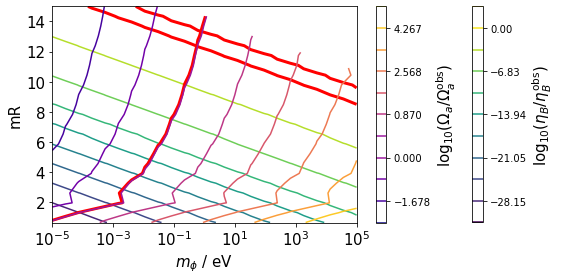

In [78]:
plt.figure(figsize=(8,4))
num_lines = 10
fts = 15

A = np.log10(obs[:, :, 0] / constants.eta_B_observed)
level = np.sort(np.concatenate([[0], np.linspace(np.nanmin(A), np.nanmax(A), num_lines)]))
C1 = plt.contour(m_phi_range * 1e9, mR_range, A, levels=level, cmap="viridis")
cbar1 = plt.colorbar(pad=0.08)
cbar1.set_label(r"$\log_{10} ( \eta_B / \eta_B^{\mathrm{obs}})$", fontsize=fts)
C1.collections[np.where(C1.levels == 0)[0][0]].set_color("red")
C1.collections[np.where(C1.levels == 0)[0][0]].set_linewidths(3)

B = np.log10(obs[:, :, 1] / constants.Omega_DM_h_sq)
level = np.sort(np.concatenate([[0], np.linspace(np.nanmin(B), np.nanmax(B), num_lines)]))
C2 = plt.contour(m_phi_range * 1e9, mR_range, B, levels=level, cmap="plasma")
cbar2 = plt.colorbar()
cbar2.set_label(r"$\log_{10} ( \Omega_a / \Omega_a^{\mathrm{obs}})$", fontsize=fts)
C2.collections[np.where(C2.levels == 0)[0][0]].set_linewidths(3)
C2.collections[np.where(C2.levels == 0)[0][0]].set_color("red")

plt.xlabel("$m_\phi$ / eV", fontsize=fts)
plt.ylabel("mR", fontsize=fts)
plt.xticks(fontsize=fts)
plt.yticks(fontsize=fts)
plt.xscale("log")
plt.tight_layout()